<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

In [0]:
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [0]:
df['a'].mean()

3.0

In [0]:
df['a'].min()

1

In [0]:
df['a'].max()

5

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
sample.shape

(1000,)

In [0]:
np.mean(sample)

-0.0030303208465540365

In [0]:
mu - np.mean(sample)

0.0030303208465540365

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

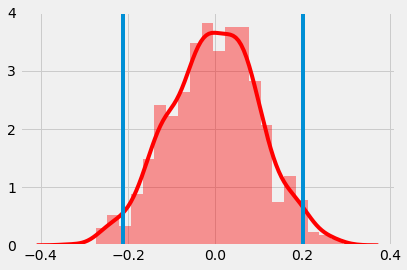

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

In [0]:
# 68-95-99 rule, empircal rule, shorthand used to remember the percentage of values that lie within a band around the mean in a normal distribution with a width of two, four and six standard deviations
# More accurately, 68.27%, 95.45% and 99.73% of the values lie within one, two, and three standard deviations of the mean.
# Empirically usefl to treat 99.7% probability as near certainty

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

In [0]:
# Central limit theorem - https://en.wikipedia.org/wiki/Central_limit_theorem

In [0]:
# Track calories in one yaer
person1_cals = np.random.normal(2500, 100, size=365)   #(2500- mean, 100-std, size- number of days)
person1_cals

array([2608.20998275, 2646.74607826, 2389.14228721, 2376.78193087,
       2330.31767148, 2359.20156064, 2374.50044207, 2305.3724895 ,
       2524.74075307, 2376.52771171, 2505.71790429, 2675.76927417,
       2390.51074886, 2461.50629553, 2361.31849864, 2574.21203389,
       2492.04370758, 2380.25418548, 2476.39830271, 2468.99950125,
       2457.60542584, 2715.23591067, 2486.77093266, 2645.67919405,
       2382.28972847, 2271.58740432, 2492.86501582, 2374.53951454,
       2328.55306615, 2285.26148236, 2621.43827064, 2460.22133037,
       2394.12892137, 2533.58427481, 2523.86625212, 2421.85456039,
       2428.16046462, 2471.90333558, 2412.75684908, 2371.41897657,
       2418.89543018, 2431.71517151, 2592.64470991, 2588.0589375 ,
       2592.04802507, 2511.71077201, 2584.44914243, 2398.49657567,
       2439.79623549, 2456.53334172, 2602.56803223, 2402.01016672,
       2624.10823535, 2477.98625067, 2620.64553621, 2473.24740095,
       2465.09376173, 2391.95080737, 2442.61596536, 2466.50533

In [0]:
# Plot hist
import matplotlib.pyplot as plt
import seaborn as sns

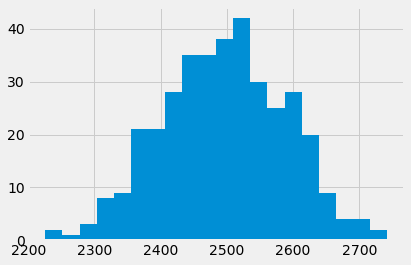

In [0]:
plt.hist(person1_cals, bins=20);

In [0]:
person1_cals.mean()

2495.681666666589

In [0]:
person1_cals.var()

8640.669321273353

In [0]:
person1_cals.std()

92.9552006144538

In [0]:
# Do same but for more people
N = 200
people_cals = [np.random.normal(2500, 100, size=365) for _ in range(N)]  # Since not using i in iteration, just put an underscore


In [0]:
people_cals

[array([2574.57066804, 2313.84029269, 2594.08168439, 2539.55333335,
        2513.1243172 , 2553.2408264 , 2723.01394655, 2543.35909372,
        2573.73032006, 2492.87355179, 2493.5672694 , 2527.29736257,
        2611.36165295, 2503.65992675, 2511.69513145, 2549.72690965,
        2505.56848454, 2425.38139523, 2561.79696967, 2544.90705931,
        2692.89835456, 2282.63926879, 2504.94538771, 2476.16760112,
        2506.08808494, 2490.26359049, 2535.58542653, 2356.80380443,
        2430.41843022, 2670.10563622, 2441.41343241, 2470.34349624,
        2481.73280986, 2604.33230491, 2637.16419769, 2731.83099448,
        2466.50126408, 2693.94804103, 2595.42883963, 2475.63716589,
        2438.8975214 , 2534.18228978, 2499.98086754, 2497.23297565,
        2584.20731607, 2571.24553199, 2482.93862605, 2536.83302476,
        2543.15373912, 2551.83690544, 2572.67143787, 2402.66639863,
        2715.12957003, 2493.96259455, 2568.46485282, 2481.6444587 ,
        2574.58129926, 2583.39588317, 2515.95501

In [0]:
people_mean_cals=[person.mean() for person in people_cals]
people_mean_cals[:10]

[2509.274751552015,
 2495.0749841392035,
 2501.00021960083,
 2498.5519628537586,
 2498.989209181806,
 2503.958065926151,
 2503.8009587212837,
 2497.7114136220407,
 2507.036674384535,
 2489.689140652508]

(array([ 1.,  5.,  4., 12.,  9., 19., 22., 27., 22., 14., 29., 14.,  7.,
         7.,  2.,  2.,  2.,  1.,  0.,  1.]),
 array([2487.05753752, 2488.65180382, 2490.24607011, 2491.84033641,
        2493.43460271, 2495.02886901, 2496.62313531, 2498.21740161,
        2499.81166791, 2501.40593421, 2503.00020051, 2504.5944668 ,
        2506.1887331 , 2507.7829994 , 2509.3772657 , 2510.971532  ,
        2512.5657983 , 2514.1600646 , 2515.7543309 , 2517.3485972 ,
        2518.94286349]),
 <a list of 20 Patch objects>)

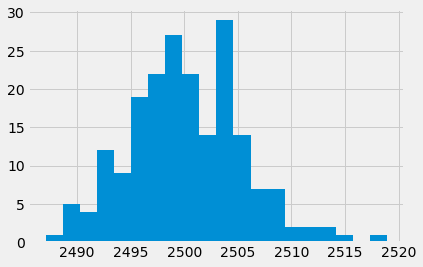

In [0]:
# visualize above list
plt.hist(people_mean_cals, bins=20)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
# one with 10 DF, 100 DF, 1000 DF
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

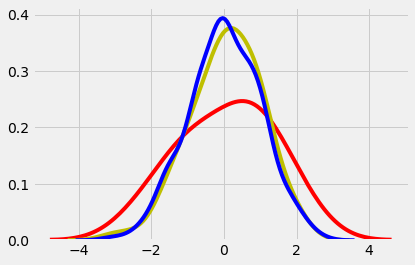

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
# Put in a list and iterate them and computer mean, std, var
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.06445652395014653
Standard Deviation: 1.2334452029094376
Variance: 1.5213870685803037
t - distribution with 100 degrees of freedom
------------------------------
Mean: 0.06785302204222936
Standard Deviation: 0.9860115351936012
Variance: 0.9722187475348422
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.01943158974524171
Standard Deviation: 1.0070593881696512
Variance: 1.0141686113006323


In [0]:
# Old way
print('text1' +  ' ' + 'text2')

text1 text2


In [0]:
# another way

In [0]:
a = 3.0
print('my number is %s' %a)

my number is 3.0


In [0]:
print('my number is {}'.format(a))

my number is 3.0


In [0]:
# Most preferable way to do it
print(f'my number is {a}')

my number is 3.0


In [0]:
#print(f'my number is {a} ---watch video for what you missed

Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
#Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively.

In [0]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(size=n1, scale=sigma1, loc=mu1)  # can pass parameters in any order if you name them, otherwise must be in order if not named

In [0]:
sample1[:10]

array([177.74555949, 173.26686572, 179.08597149, 182.16462001,
       182.20482725, 177.05366696, 173.53267574, 174.52645323,
       180.00311829, 183.57504058])

In [0]:
# other sample up in notebook to remove it here so can use
del sample

In [0]:
# 2nd one
mu2 = 178.5
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(scale=sigma2, loc=mu2, size=n2)

In [0]:
sample2[:10]

array([180.82966808, 173.99734855, 175.36421084, 167.6779315 ,
       179.38487465, 184.67226476, 180.84381749, 184.15530425,
       175.41436612, 174.45271834])

In [0]:
# plot
import seaborn as sns

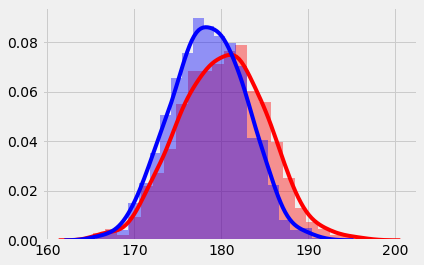

In [0]:
sns.distplot(sample1, color='r')
sns.distplot(sample2, color='b');

# The four parts of t-tests

- Null hypothesis (formulate before you do any testing, aka status quo, boring hypothesis), $\mu1 == \mu2$
- Alternative hypothesis: e.g. $\mu1 =/=  \mu2$ (not equal to each other)
- t-statistic
- p-value

In [0]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=7.361722354609647, pvalue=2.74960942552965e-13)

In [0]:
# if pvalue is lower than threshold, you reject null hypothesis - however, still a possibility you might be wrong though
# if pvalue greater than threshold, you can accept null hypothesis

In [0]:
pvalue_list = []

for _ in range(100):
  mu1 = 180
  sigma1 = 5
  n1 = 100
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  mu2 = 180
  sigma2 = 5
  n2 = 100
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

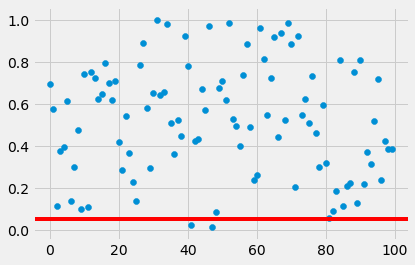

In [0]:
plt.scatter(list(range(100)), pvalue_list);
plt.axhline(y=0.05, color='r');               # .05 is literature but in real world, lot lower

In [0]:
# points above line means failing to reject the Null hypothesis
# points below red line means we are rejecting the Null hypothesis

In [0]:
pvalue_arr = np.array(pvalue_list)
pvalue_arr > 0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [0]:
np.sum(pvalue_arr > 0.05)

98

### Type 1 vs Type II Errors
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

# Test Statistic

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics

# P-value
https://stats.stackexchange.com/questions/166323/misunderstanding-a-p-value

# One-Tailed vs two-tailed
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

https://www.youtube.com/watch?v=VP1bhopNP74

# One sample vs two sample
https://web.ma.utexas.edu/users/mks/statmistakes/2samplevs1sampletest.html

In [0]:
df = pd.read_csv('master.csv')

In [0]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
df.shape

(27820, 12)

In [0]:
df['year'].max()

2016

In [0]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [0]:
df_2016 = df[df['year'] ==2016]
df_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent


In [0]:
df_2016['country'].unique()

array(['Armenia', 'Austria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Grenada', 'Hungary', 'Iceland', 'Lithuania', 'Mauritius',
       'Mongolia', 'Netherlands', 'Qatar', 'Romania', 'Sweden',
       'Thailand'], dtype=object)

In [0]:
df_male = df_2016[df_2016['sex'] == 'male']
df_female = df_2016[df_2016['sex'] == 'female']

In [0]:
df_male.shape

(80, 12)

In [0]:
df_female.shape

(80, 12)

In [0]:
df_female_group = df_female.groupby(['country', 'age']).mean()

In [0]:
df_male_group = df_male.groupby(['country', 'age']).mean()

In [0]:
df_female_group

country
Armenia            1.174
Austria            7.520
Croatia            8.374
Cyprus             1.012
Czech Republic     5.344
Grenada            0.000
Hungary           10.206
Iceland            2.936
Lithuania          8.916
Mauritius          2.560
Mongolia           5.636
Netherlands        8.066
Qatar              0.576
Romania            3.506
Sweden             8.204
Thailand           3.068
Name: suicides/100k pop, dtype: float64

In [0]:
df_female_group = df_female.groupby(['country', 'age'], as_index=False).mean().groupby('country')['suicides/100k pop'].mean()

In [0]:
df_female_group

country
Armenia            1.174
Austria            7.520
Croatia            8.374
Cyprus             1.012
Czech Republic     5.344
Grenada            0.000
Hungary           10.206
Iceland            2.936
Lithuania          8.916
Mauritius          2.560
Mongolia           5.636
Netherlands        8.066
Qatar              0.576
Romania            3.506
Sweden             8.204
Thailand           3.068
Name: suicides/100k pop, dtype: float64

In [0]:
df_female[df_female['country'] == 'Netherlands']['suicides/100k pop'].mean()

8.065999999999999

In [0]:
df_female[df_female['country'] == 'Armenia']['suicides/100k pop'].mean()

1.174

In [0]:
df_male[df_male['country'] == 'Netherlands']['suicides/100k pop'].mean()

17.412

In [0]:
df_male[df_male['country'] == 'Armenia']['suicides/100k pop'].mean()

6.938000000000001

In [0]:
# ttest
ttest_ind(df_female_group, df_male_group)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=array([-5.44283980e+03, -2.59838938e+00, -2.19537350e+00, -3.34880630e+00,
                   nan, -4.79597053e+00]), pvalue=array([3.04483830e-260, 1.08740382e-002, 3.05985928e-002, 1.16898976e-003,
                   nan, 6.06190419e-006]))

In [0]:
ttest_ind(df_female_group, df_male_group, equal_var=True)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=array([-5.44283980e+03, -2.59838938e+00, -2.19537350e+00, -3.34880630e+00,
                   nan, -4.79597053e+00]), pvalue=array([3.04483830e-260, 1.08740382e-002, 3.05985928e-002, 1.16898976e-003,
                   nan, 6.06190419e-006]))

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means